In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [22]:
data = pd.read_csv('Data.csv')


In [ ]:

print(data.isnull().sum())

imputer = SimpleImputer(strategy='mean')
data['Monthly Salary'] = imputer.fit_transform(data[['Monthly Salary']])

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Monthly Salary         0
dtype: int64


In [24]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Education Level'] = label_encoder.fit_transform(data['Education Level'])
data['Job Title'] = label_encoder.fit_transform(data['Job Title'])

In [25]:
top_10_jobs = data.groupby('Job Title')['Monthly Salary'].mean().nlargest(10)
print(top_10_jobs)

Job Title
7      2.500000e+07
9      2.500000e+07
8      2.200000e+07
28     2.045614e+07
26     2.000000e+07
190    2.000000e+07
102    1.900000e+07
191    1.900000e+07
33     1.875000e+07
96     1.839844e+07
Name: Monthly Salary, dtype: float64


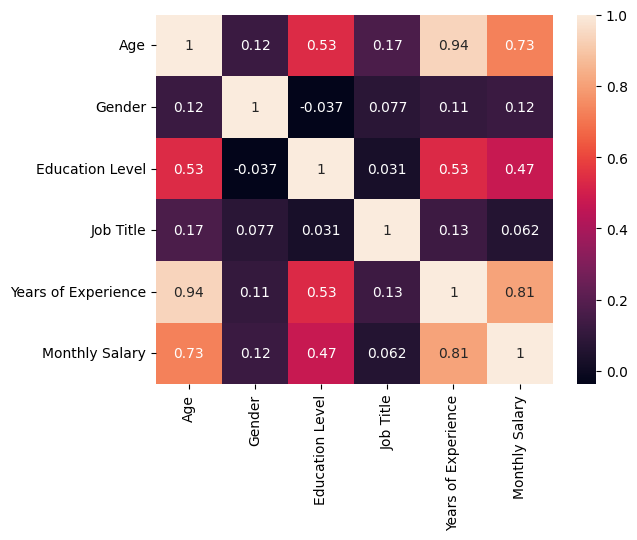

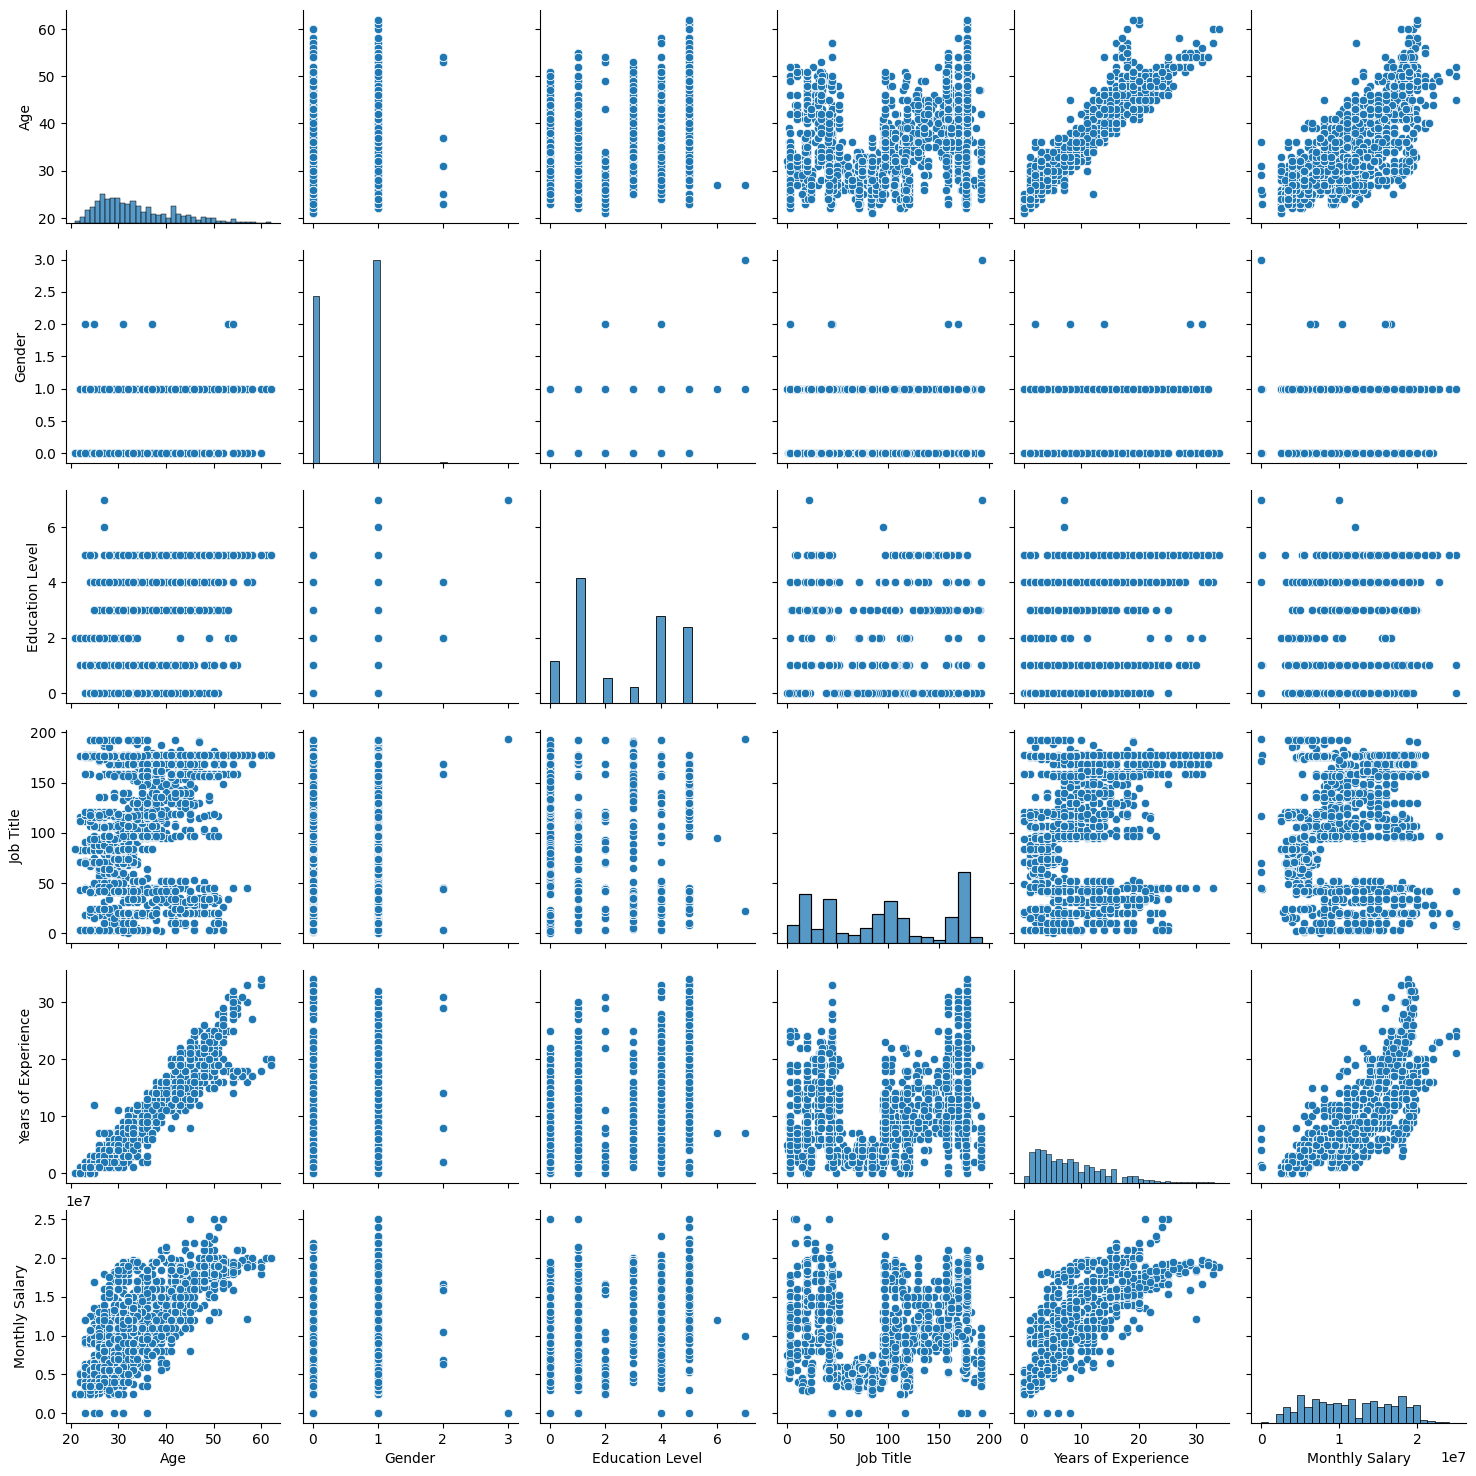

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Pair plots
sns.pairplot(data)
plt.show()

In [28]:
# Split the data into features and target variable
data= data.dropna(axis= 0, how='any')
X = data.drop('Monthly Salary', axis=1)
y = data['Monthly Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train models
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print()

# Cross-validation
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"Model: {model.__class__.__name__}")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean CV Score: {-scores.mean():.2f}")
    print()

Model: LinearRegression
Mean Squared Error: 9066009988904.61
R-squared: 0.67

Model: DecisionTreeRegressor
Mean Squared Error: 1298343570909.08
R-squared: 0.95

Model: RandomForestRegressor
Mean Squared Error: 773156244269.34
R-squared: 0.97

Model: LinearRegression
Cross-validation scores: [-9.84402218e+12 -8.58270623e+12 -9.90545683e+12 -9.08547709e+12
 -9.09621356e+12]
Mean CV Score: 9302775177801.82

Model: DecisionTreeRegressor
Cross-validation scores: [-1.73066535e+12 -8.10824028e+11 -1.15771437e+12 -1.13643305e+12
 -6.64145686e+11]
Mean CV Score: 1099956496702.37

Model: RandomForestRegressor
Cross-validation scores: [-9.95199798e+11 -6.59670369e+11 -7.88042219e+11 -7.49704592e+11
 -4.75896704e+11]
Mean CV Score: 733702736170.00



In [29]:
# Split the data into features and target variable
data['Salary_Class'] = pd.cut(data['Monthly Salary'], bins=[0, 5000, 10000, np.inf], labels=['Low', 'Medium', 'High'])

# Convert the target variable to numerical labels
label_encoder = LabelEncoder()
data['Salary_Class'] = label_encoder.fit_transform(data['Salary_Class'])

# Split the data into features and target variable
X = data.drop(['Monthly Salary', 'Salary_Class'], axis=1)
y = data['Salary_Class']

data= data.dropna(axis= 0, how='any')
X = data.drop('Monthly Salary', axis=1)
y = data['Monthly Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train models
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print()

# Cross-validation
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"Model: {model.__class__.__name__}")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean CV Score: {-scores.mean():.2f}")
    print()

Model: LinearRegression
Mean Squared Error: 9066630606293.10
R-squared: 0.67

Model: DecisionTreeRegressor
Mean Squared Error: 1333628893523.77
R-squared: 0.95

Model: RandomForestRegressor
Mean Squared Error: 715754805422.77
R-squared: 0.97

Model: LinearRegression
Cross-validation scores: [-9.77735460e+12 -8.58494855e+12 -9.76809294e+12 -9.08368578e+12
 -9.09536106e+12]
Mean CV Score: 9261888585534.25

Model: DecisionTreeRegressor
Cross-validation scores: [-1.59809503e+12 -7.77376110e+11 -1.11450801e+12 -1.17426838e+12
 -5.96868089e+11]
Mean CV Score: 1052223123280.66

Model: RandomForestRegressor
Cross-validation scores: [-9.76740096e+11 -6.57016068e+11 -7.56867571e+11 -7.31588514e+11
 -4.89609664e+11]
Mean CV Score: 722364382573.32

